<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

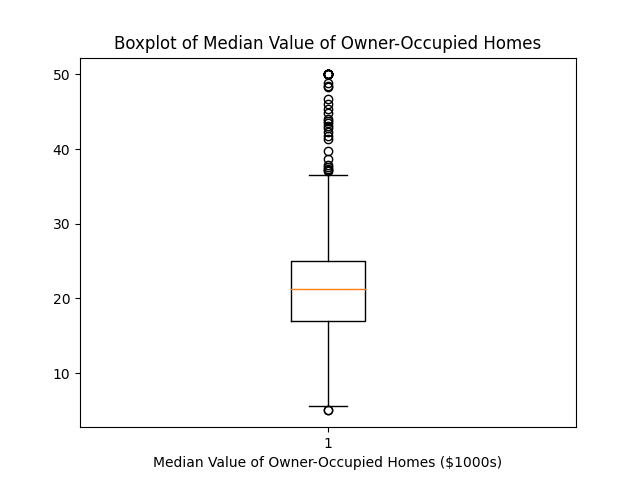

In [8]:
# Create boxplot
plt.boxplot(boston_df['MEDV'])

# Add labels and title
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.show()

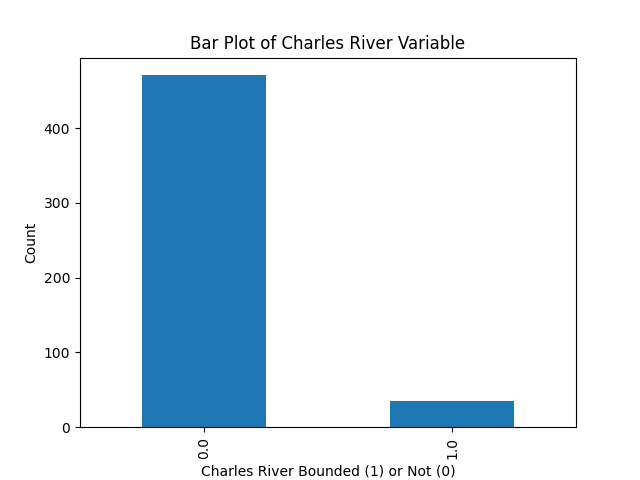

In [9]:
# Count the number of occurrences of each value in the "CHAS" column
chas_counts = boston_df['CHAS'].value_counts()

# Create bar plot
chas_counts.plot.bar()

# Add labels and title
plt.xlabel('Charles River Bounded (1) or Not (0)')
plt.ylabel('Count')
plt.title('Bar Plot of Charles River Variable')
plt.show()


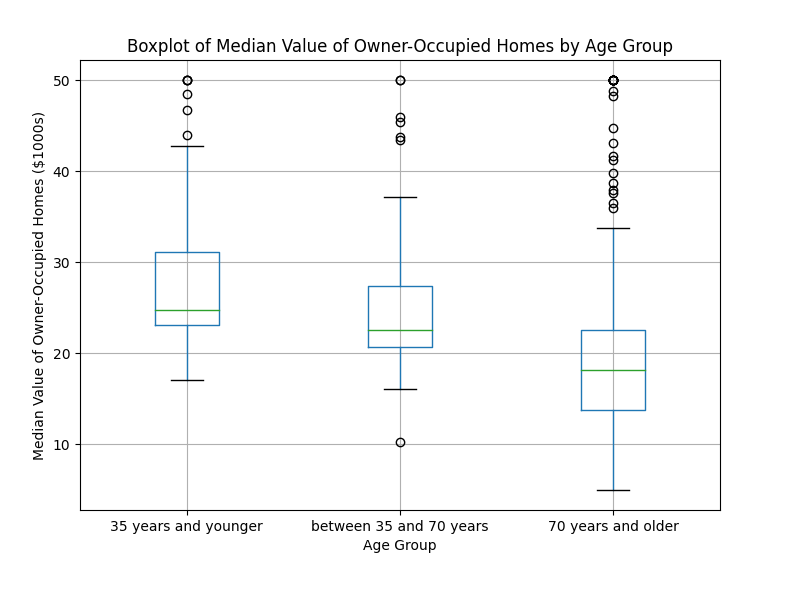

In [10]:
# Discretize the "AGE" variable into three groups
age_bins = [0, 35, 70, 100]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Create boxplot
boston_df.boxplot(column='MEDV', by='AGE_group', figsize=(8,6))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
plt.suptitle('')
plt.show()


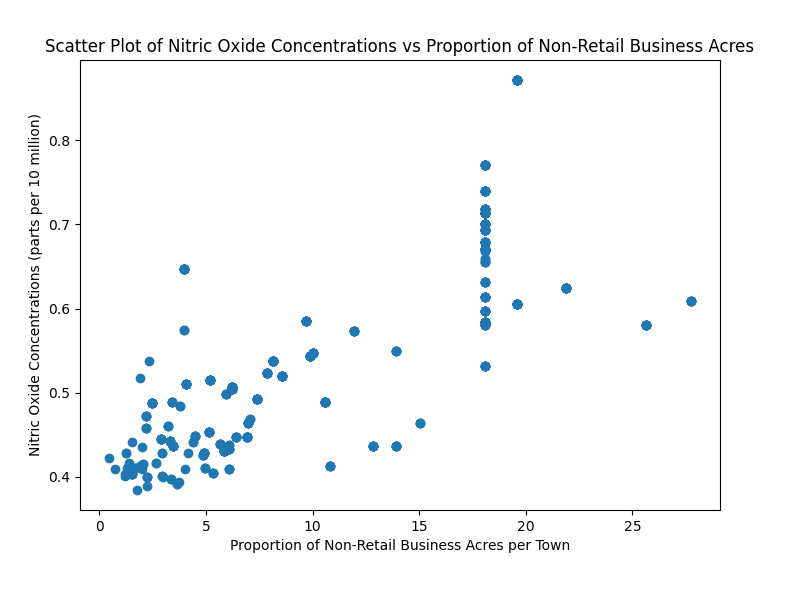

In [11]:
# Create scatter plot
plt.scatter(boston_df['INDUS'], boston_df['NOX'])

# Add labels and title
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.show()


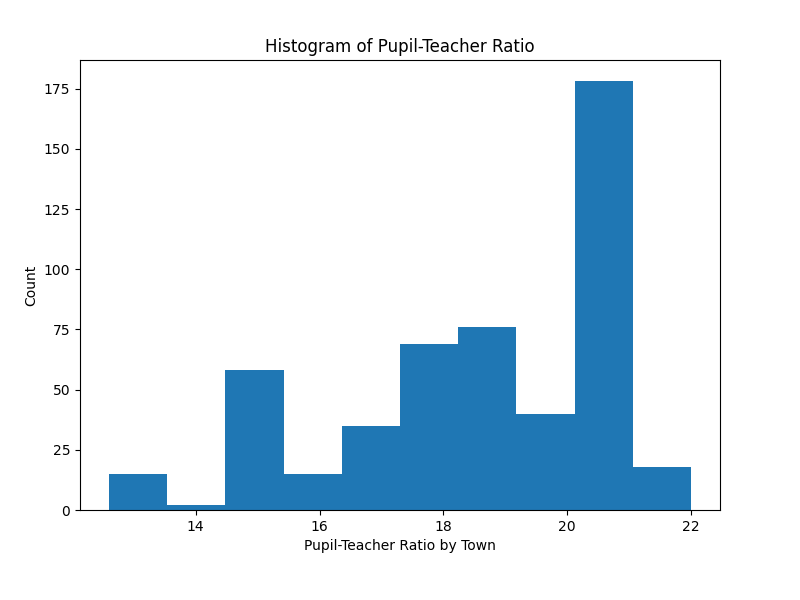

In [12]:
# Create histogram
plt.hist(boston_df['PTRATIO'], bins=10)

# Add labels and title
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Count')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.show()


In [13]:
import scipy.stats as stats

# Subset data into two groups: houses bounded by the Charles river and houses not bounded by the Charles river
charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(charles, not_charles)

# Print results
print('T-Statistic:', t_stat)
print('P-Value:', p_value)

# Conclusion
if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded by the Charles river or not.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no significant difference in median value of houses bounded by the Charles river or not.')


T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
We reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded by the Charles river or not.


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print results
print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < 0.05:
    print('We reject the null hypothesis and conclude that there is a difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).')
else:
    print('We fail to reject the null hypothesis and conclude that there is no difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).')


                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN
We fail to reject the null hypothesis and conclude that there is no difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


In [15]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print('Correlation Coefficient:', corr_coef)
print('P-Value:', p_value)

# Conclusion
if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.')


Correlation Coefficient: 0.7636514469209189
P-Value: 7.913361061211254e-98
We reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [16]:
import statsmodels.api as sm

# Fit regression model
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# Conclusion
if model.pvalues[1] < 0.05:
    print('We reject the null hypothesis and conclude that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.')


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        00:31:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0